<a href="https://colab.research.google.com/github/danielee3/ProjectWX/blob/main/How_Cold_Is_It_Tomorrow%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [126]:
ithaca = pd.read_csv('/content/gdrive/MyDrive/Weather ML Project/ITH_temp_Apr2011_Mar2021.csv')

station: three or four character site identifier

valid: timestamp of the observation

tmpf: Air Temperature in Fahrenheit, typically @ 2 meters

dwpf: Dew Point Temperature in Fahrenheit, typically @ 2 meters

relh: Relative Humidity in % 

drct: Wind Direction in degrees from north 

sknt: Wind Speed in knots 

p01i: One hour precipitation for the period from the observation time to the time of the previous hourly precipitation reset. 

alti: Pressure altimeter in inches

mslp: Sea Level Pressure in millibar 

vsby: Visibility in miles 

gust: Wind Gust in knots 

skyc1: Sky Level 1 Coverage 

skyc2: Sky Level 2 Coverage 

skyc3: Sky Level 3 Coverage 

skyc4: Sky Level 4 Coverage

skyl1: Sky Level 1 Altitude in feet 

skyl2: Sky Level 2 Altitude in feet 

skyl3: Sky Level 3 Altitude in feet 

skyl4: Sky Level 4 Altitude in feet 

wxcodes: Present Weather Codes (space seperated)

In [128]:
print(ithaca.shape)

(586172, 3)


In [129]:
is_METAR = ithaca['valid'].str.contains("56")
is_leap_year = ithaca['valid'].str.contains("02-29")
temp_missing = ithaca['tmpf'].str.contains("M")

In [130]:
ithaca = ithaca[is_METAR & (is_leap_year==False) & (temp_missing==False)]

In [132]:
print(ithaca.shape)

(85287, 3)


In [134]:
time_stamp = pd.to_datetime(ithaca['valid'])
temp_series = ithaca['tmpf'].astype(float)

In [135]:
time_stamp.head()

1   2011-04-01 00:56:00
2   2011-04-01 01:56:00
3   2011-04-01 02:56:00
4   2011-04-01 03:56:00
6   2011-04-01 04:56:00
Name: valid, dtype: datetime64[ns]

In [136]:
temp_series.head()

1    33.98
2    33.98
3    32.90
4    32.90
6    32.90
Name: tmpf, dtype: float64

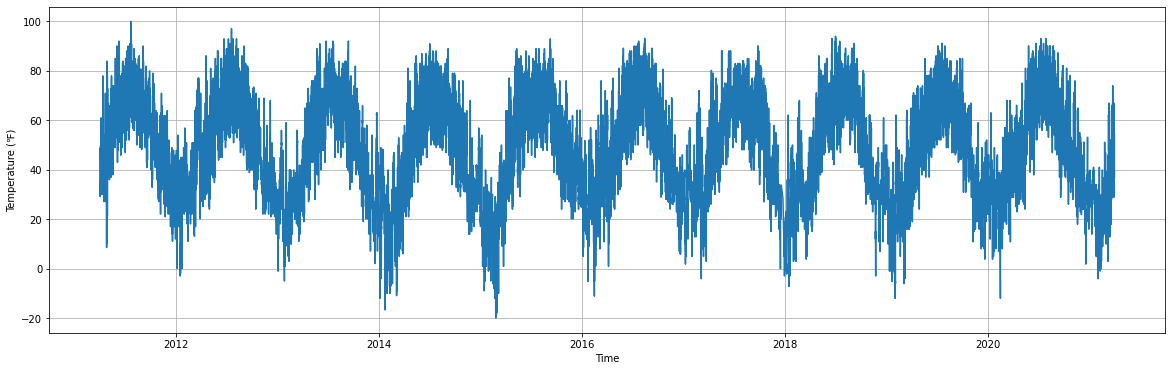

In [137]:
plt.figure(figsize=(20, 6))
plt.plot(time_stamp, temp_series)
plt.xlabel("Time")
plt.ylabel("Temperature (℉)")
plt.grid(True)